In [2]:
import numpy as np
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0-rc1'

In [46]:
x_train = []
t_train = []
x_test = []
t_test = []

mu, sigma = 1, 0.1

for i in range(0,2000):
    data = np.array([0,0,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([1,0,0,0])
    
    data = np.array([1,1,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([1,0,0,0])
    
    data = np.array([0,0,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,1,0,0])      
    
    data = np.array([1,1,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,1,0,0])
    
    data = np.array([0,1,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,1,0])
      
    data = np.array([1,1,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,1,0])
    
    data = np.array([1,0,0])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,1])
     
    data = np.array([0,1,1])- np.random.normal(mu, sigma, 3)
    x_train.append(data)
    t_train.append([0,0,0,1])
    
    
for i in range(0,500):
    data = np.array([0,0,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([1,0,0,0])
    
    data = np.array([1,1,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([1,0,0,0])
    
    data = np.array([0,0,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,1,0,0])      
    
    data = np.array([1,1,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,1,0,0])
    
    data = np.array([0,1,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,1,0])
      
    data = np.array([1,1,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,1,0])
    
    data = np.array([1,0,0])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,1])
     
    data = np.array([0,1,1])- np.random.normal(mu, sigma, 3)
    x_test.append(data)
    t_test.append([0,0,0,1])


x_train = np.array(x_train)
t_train = np.array(t_train)

x_test = np.array(x_test)
t_test = np.array(t_test)

print(x_train.shape)
print(t_train.shape)

print(x_test.shape)
print(t_test.shape)

(16000, 3)
(16000, 4)
(4000, 3)
(4000, 4)


In [53]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, t_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, t_test)).batch(32)

In [54]:
def gen_model(hidden_layer,kernel_initializer):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=3),
        tf.keras.layers.Dense(hidden_layer,
                              kernel_initializer=kernel_initializer,
                              activation='relu'),
        tf.keras.layers.Dense(4,
                              kernel_initializer=kernel_initializer,
                              activation='softmax')
    ])
    
    return model

## Keras initializers

- random_normal
- random_uniform


- glorot_normal : Xavior init Gaussian
- glorot_uniform : Xavior init Uniform


- he_normal : He init Gaussian
- he_uniform : He init Uniform

In [73]:
kernel_initializer1 = tf.keras.initializers.he_normal(seed=None)
kernel_initializer2 = tf.keras.initializers.he_uniform(seed=None)
kernel_initializer3 = tf.keras.initializers.glorot_normal(seed=None)
kernel_initializer4 = tf.keras.initializers.glorot_uniform(seed=None)
kernel_initializer5 = tf.keras.initializers.RandomNormal(seed=None)
kernel_initializer6 = tf.keras.initializers.RandomUniform(seed=None)

weight_init_list = [kernel_initializer1,
                    kernel_initializer2,
                    kernel_initializer3,
                    kernel_initializer4,
                    kernel_initializer5,
                    kernel_initializer6]
weight_init_name = ['he_normal',
                   'he_uniform',
                   'xavior_normal',
                   'xavior_uniform',
                   'random_normal',
                   'random_uniform']

In [78]:
import pickle

EPOCHS = 100
idx = 0

for kernel_initializer in weight_init_list:
    loss_object = tf.keras.losses.BinaryCrossentropy()
    optimizer = tf.keras.optimizers.Adam()
    
    @tf.function
    def train_step(data, labels):
        with tf.GradientTape() as tape:
            predictions = model(data)
            loss = loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_accuracy(labels, predictions)

    @tf.function
    def test_step(data, labels):
        predictions = model(data)
        t_loss = loss_object(labels, predictions)

        test_loss(t_loss)
        test_accuracy(labels, predictions)
        
    model = gen_model(5, kernel_initializer)
    idx += 1
    tr_loss = []
    tr_acc = []
    te_loss = []
    te_acc = []

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')
    
    for epoch in range(EPOCHS):
        for data, labels in train_ds:
            train_step(data, labels)

        for test_data, test_labels in test_ds:
            test_step(test_data, test_labels)

        template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
        print(template.format(epoch+1,
                             train_loss.result(),
                             train_accuracy.result()*100,
                             test_loss.result(),
                             test_accuracy.result()*100))

        tr_loss.append(train_loss.result())
        tr_acc.append(train_accuracy.result()*100)
        te_loss.append(test_loss.result())
        te_acc.append(test_accuracy.result()*100)
        
    with open('kernel_init_{}.txt'.format(idx), 'wb') as f:
         pickle.dump([tr_loss,tr_acc,te_loss,te_acc], f)

W1016 14:46:52.828059 17416 base_layer.py:1814] Layer dense_38 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 1, 손실: 0.5454753637313843, 정확도: 74.6968765258789, 테스트 손실: 0.487883597612381, 테스트 정확도: 76.7125015258789
에포크: 2, 손실: 0.4874063730239868, 정확도: 77.58984375, 테스트 손실: 0.4293768107891083, 테스트 정확도: 81.49687957763672
에포크: 3, 손실: 0.4351966977119446, 정확도: 81.05052185058594, 테스트 손실: 0.38490983843803406, 테스트 정확도: 84.33332824707031
에포크: 4, 손실: 0.39462119340896606, 정확도: 83.33319854736328, 테스트 손실: 0.35177862644195557, 테스트 정확도: 85.7578125
에포크: 5, 손실: 0.36306729912757874, 정확도: 84.67530822753906, 테스트 손실: 0.3255298435688019, 테스트 정확도: 86.6624984741211
에포크: 6, 손실: 0.3366055190563202, 정확도: 85.62552642822266, 테스트 손실: 0.30234095454216003, 테스트 정확도: 87.31353759765625
에포크: 7, 손실: 0.31327110528945923, 정확도: 86.61183166503906, 테스트 손실: 0.28190842270851135, 테스트 정확도: 88.20446014404297
에포크: 8, 손실: 0.2930186986923218, 정확도: 87.48516082763672, 테스트 손실: 0.26431894302368164, 테스트 정확도: 88.8929672241211
에포크: 9, 손실: 0.275626003742218, 정확도: 88.16718292236328, 테스트 손실: 0.24925312399864197, 테스트 정확도: 89.43611145019531
에포크: 10, 손실

에포크: 74, 손실: 0.11632085591554642, 정확도: 93.06275177001953, 테스트 손실: 0.11199336498975754, 테스트 정확도: 93.35777282714844
에포크: 75, 손실: 0.11595455557107925, 정확도: 93.07347869873047, 테스트 손실: 0.11168346554040909, 테스트 정확도: 93.36399841308594
에포크: 76, 손실: 0.11559673398733139, 정확도: 93.0817642211914, 테스트 손실: 0.11137355118989944, 테스트 정확도: 93.37187194824219
에포크: 77, 손실: 0.11524784564971924, 정확도: 93.09026336669922, 테스트 손실: 0.1110774427652359, 테스트 정확도: 93.37848663330078
에포크: 78, 손실: 0.11490766704082489, 정확도: 93.09805297851562, 테스트 손실: 0.11078250408172607, 테스트 정확도: 93.38621520996094
에포크: 79, 손실: 0.1145765408873558, 정확도: 93.105224609375, 테스트 손실: 0.11049437522888184, 테스트 정확도: 93.39319610595703
에포크: 80, 손실: 0.11425222456455231, 정확도: 93.11216735839844, 테스트 손실: 0.1102147325873375, 테스트 정확도: 93.39851379394531
에포크: 81, 손실: 0.11393610388040543, 정확도: 93.11944580078125, 테스트 손실: 0.10994439572095871, 테스트 정확도: 93.40385437011719
에포크: 82, 손실: 0.1136263906955719, 정확도: 93.12806701660156, 테스트 손실: 0.10968188941478729, 테스트 정확도:

W1016 14:48:49.510699 17416 base_layer.py:1814] Layer dense_40 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.10905825346708298, 정확도: 93.2366714477539, 테스트 손실: 0.10575966536998749, 테스트 정확도: 93.4938735961914
에포크: 1, 손실: 0.5086698532104492, 정확도: 75.2249984741211, 테스트 손실: 0.44867631793022156, 테스트 정확도: 77.8125
에포크: 2, 손실: 0.45706412196159363, 정확도: 77.9742202758789, 테스트 손실: 0.4066203534603119, 테스트 정확도: 80.97187042236328
에포크: 3, 손실: 0.4151194989681244, 정확도: 80.25104522705078, 테스트 손실: 0.37178465723991394, 테스트 정확도: 82.92499542236328
에포크: 4, 손실: 0.3814218044281006, 정확도: 82.05741882324219, 테스트 손실: 0.34437909722328186, 테스트 정확도: 84.01093292236328
에포크: 5, 손실: 0.3548494577407837, 정확도: 83.14562225341797, 테스트 손실: 0.32311591506004333, 테스트 정확도: 84.67124938964844
에포크: 6, 손실: 0.33386126160621643, 정확도: 83.86016082763672, 테스트 손실: 0.306199312210083, 테스트 정확도: 85.0999984741211
에포크: 7, 손실: 0.3166668117046356, 정확도: 84.37745666503906, 테스트 손실: 0.29164186120033264, 테스트 정확도: 85.52767944335938
에포크: 8, 손실: 0.30078768730163574, 정확도: 85.0849609375, 테스트 손실: 0.27697625756263733, 테스트 정확도: 86.12187194824219
에포크: 9, 

에포크: 73, 손실: 0.11717937886714935, 정확도: 92.72830200195312, 테스트 손실: 0.11385327577590942, 테스트 정확도: 92.83099365234375
에포크: 74, 손실: 0.11679196357727051, 정확도: 92.74132537841797, 테스트 손실: 0.1135081946849823, 테스트 정확도: 92.84468078613281
에포크: 75, 손실: 0.11641571670770645, 정확도: 92.75323486328125, 테스트 손실: 0.11317542940378189, 테스트 정확도: 92.85724639892578
에포크: 76, 손실: 0.1160481870174408, 정확도: 92.7677001953125, 테스트 손실: 0.11284735798835754, 테스트 정확도: 92.86726379394531
에포크: 77, 손실: 0.11569012701511383, 정확도: 92.77835083007812, 테스트 손실: 0.1125277504324913, 테스트 정확도: 92.88027954101562
에포크: 78, 손실: 0.11533968150615692, 정확도: 92.79060363769531, 테스트 손실: 0.1122196614742279, 테스트 정확도: 92.89118957519531
에포크: 79, 손실: 0.11499927192926407, 정확도: 92.80213928222656, 테스트 손실: 0.11191470175981522, 테스트 정확도: 92.90190124511719
에포크: 80, 손실: 0.11466580629348755, 정확도: 92.81439208984375, 테스트 손실: 0.11161717772483826, 테스트 정확도: 92.91069793701172
에포크: 81, 손실: 0.11434163898229599, 정확도: 92.82453918457031, 테스트 손실: 0.1113298162817955, 테스트 정확도

W1016 14:50:54.645643 17416 base_layer.py:1814] Layer dense_42 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.10936581343412399, 정확도: 92.99485778808594, 테스트 손실: 0.10691087692975998, 테스트 정확도: 93.07374572753906
에포크: 1, 손실: 0.5177146196365356, 정확도: 76.48750305175781, 테스트 손실: 0.45644959807395935, 테스트 정확도: 80.2750015258789
에포크: 2, 손실: 0.4564690589904785, 정확도: 79.42655944824219, 테스트 손실: 0.39707425236701965, 테스트 정확도: 82.31562042236328
에포크: 3, 손실: 0.4042609930038452, 정확도: 81.67239379882812, 테스트 손실: 0.35348451137542725, 테스트 정확도: 84.67500305175781
에포크: 4, 손실: 0.36300042271614075, 정확도: 84.39765930175781, 테스트 손실: 0.31877318024635315, 테스트 정확도: 86.87812805175781
에포크: 5, 손실: 0.32970407605171204, 정확도: 86.22906494140625, 테스트 손실: 0.2912287712097168, 테스트 정확도: 88.23249816894531
에포크: 6, 손실: 0.30308979749679565, 정확도: 87.46353912353516, 테스트 손실: 0.26947176456451416, 테스트 정확도: 89.14270782470703
에포크: 7, 손실: 0.2817489802837372, 정확도: 88.35334777832031, 테스트 손실: 0.2521018087863922, 테스트 정확도: 89.7892837524414
에포크: 8, 손실: 0.26438379287719727, 정확도: 89.02421569824219, 테스트 손실: 0.2378682643175125, 테스트 정확도: 90.27656

에포크: 73, 손실: 0.108706533908844, 정확도: 93.22102355957031, 테스트 손실: 0.10514873266220093, 테스트 정확도: 93.40093994140625
에포크: 74, 손실: 0.10841058194637299, 정확도: 93.22634887695312, 테스트 손실: 0.10489770770072937, 테스트 정확도: 93.40625
에포크: 75, 손실: 0.10812258720397949, 정확도: 93.23230743408203, 테스트 손실: 0.1046534925699234, 테스트 정확도: 93.41166687011719
에포크: 76, 손실: 0.10784220695495605, 정확도: 93.23665618896484, 테스트 손실: 0.10441568493843079, 테스트 정확도: 93.41693878173828
에포크: 77, 손실: 0.10756906867027283, 정확도: 93.24381256103516, 테스트 손실: 0.10418388992547989, 테스트 정확도: 93.42183685302734
에포크: 78, 손실: 0.10730277001857758, 정확도: 93.2503433227539, 테스트 손실: 0.10395801067352295, 테스트 정확도: 93.427001953125
에포크: 79, 손실: 0.10704324394464493, 정확도: 93.25466918945312, 테스트 손실: 0.10373776406049728, 테스트 정확도: 93.4312515258789
에포크: 80, 손실: 0.10679012537002563, 정확도: 93.26005554199219, 테스트 손실: 0.10352304577827454, 테스트 정확도: 93.4360122680664
에포크: 81, 손실: 0.10654348880052567, 정확도: 93.26470184326172, 테스트 손실: 0.10331378877162933, 테스트 정확도: 93.440505

W1016 14:52:55.380673 17416 base_layer.py:1814] Layer dense_44 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.10278818011283875, 정확도: 93.3473892211914, 테스트 손실: 0.1001306027173996, 테스트 정확도: 93.5092544555664
에포크: 1, 손실: 0.5322901606559753, 정확도: 74.2328109741211, 테스트 손실: 0.4753425121307373, 테스트 정확도: 75.0
에포크: 2, 손실: 0.48145830631256104, 정확도: 76.0296859741211, 테스트 손실: 0.4303446114063263, 테스트 정확도: 77.9593734741211
에포크: 3, 손실: 0.4365425109863281, 정확도: 78.22552490234375, 테스트 손실: 0.3902875483036041, 테스트 정확도: 80.01667022705078
에포크: 4, 손실: 0.39662182331085205, 정확도: 80.810546875, 테스트 손실: 0.35397055745124817, 테스트 정확도: 83.0484390258789
에포크: 5, 손실: 0.36060982942581177, 정확도: 83.28187561035156, 테스트 손실: 0.32156118750572205, 테스트 정확도: 85.12250518798828
에포크: 6, 손실: 0.3292026221752167, 정확도: 84.99114227294922, 테스트 손실: 0.2940356731414795, 테스트 정확도: 86.53125
에포크: 7, 손실: 0.30279994010925293, 정확도: 86.23124694824219, 테스트 손실: 0.2713598906993866, 테스트 정확도: 87.54017639160156
에포크: 8, 손실: 0.2809452712535858, 정확도: 87.1576156616211, 테스트 손실: 0.2527729868888855, 테스트 정확도: 88.3125
에포크: 9, 손실: 0.26282739639282227, 정확도

에포크: 74, 손실: 0.10990432649850845, 정확도: 93.09898376464844, 테스트 손실: 0.10677222907543182, 테스트 정확도: 93.11064147949219
에포크: 75, 손실: 0.10959585756063461, 정확도: 93.10960388183594, 테스트 손실: 0.1065087765455246, 테스트 정확도: 93.11708068847656
에포크: 76, 손실: 0.10929594933986664, 정확도: 93.11946868896484, 테스트 손실: 0.10625221580266953, 테스트 정확도: 93.12467193603516
에포크: 77, 손실: 0.10900402069091797, 정확도: 93.12863159179688, 테스트 손실: 0.10600638389587402, 테스트 정확도: 93.13360595703125
에포크: 78, 손실: 0.10872001200914383, 정확도: 93.1371841430664, 테스트 손실: 0.10576281696557999, 테스트 정확도: 93.14014434814453
에포크: 79, 손실: 0.1084427535533905, 정확도: 93.14530944824219, 테스트 손실: 0.10552532970905304, 테스트 정확도: 93.14652252197266
에포크: 80, 손실: 0.10817154496908188, 정확도: 93.15508270263672, 테스트 손실: 0.10529344528913498, 테스트 정확도: 93.1547622680664
에포크: 81, 손실: 0.10790764540433884, 정확도: 93.16346740722656, 테스트 손실: 0.10506829619407654, 테스트 정확도: 93.15949249267578
에포크: 82, 손실: 0.10765011608600616, 정확도: 93.17195129394531, 테스트 손실: 0.10484904050827026, 테스트 정

W1016 14:54:51.863012 17416 base_layer.py:1814] Layer dense_46 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.10389101505279541, 정확도: 93.29138946533203, 테스트 손실: 0.10163509845733643, 테스트 정확도: 93.25968933105469
에포크: 1, 손실: 0.528360903263092, 정확도: 75.0140609741211, 테스트 손실: 0.47627773880958557, 테스트 정확도: 75.41875457763672
에포크: 2, 손실: 0.47833964228630066, 정확도: 76.81172180175781, 테스트 손실: 0.42881178855895996, 테스트 정확도: 78.296875
에포크: 3, 손실: 0.4353668987751007, 정확도: 78.78593444824219, 테스트 손실: 0.39163902401924133, 테스트 정확도: 80.31458282470703
에포크: 4, 손실: 0.4000794589519501, 정확도: 80.587890625, 테스트 손실: 0.36219099164009094, 테스트 정확도: 81.47968292236328
에포크: 5, 손실: 0.3721071183681488, 정확도: 81.70999908447266, 테스트 손실: 0.3391229212284088, 테스트 정확도: 82.59750366210938
에포크: 6, 손실: 0.3489967882633209, 정확도: 82.82473754882812, 테스트 손실: 0.31907105445861816, 테스트 정확도: 83.73332977294922
에포크: 7, 손실: 0.3281407058238983, 정확도: 83.86004638671875, 테스트 손실: 0.3003357946872711, 테스트 정확도: 84.68214416503906
에포크: 8, 손실: 0.30899617075920105, 정확도: 84.8062515258789, 테스트 손실: 0.2831825315952301, 테스트 정확도: 85.66796875
에포크: 9, 손실: 

에포크: 74, 손실: 0.1169535219669342, 정확도: 92.74285888671875, 테스트 손실: 0.11378730833530426, 테스트 정확도: 92.78682708740234
에포크: 75, 손실: 0.11656511574983597, 정확도: 92.75677490234375, 테스트 손실: 0.11344411224126816, 테스트 정확도: 92.79574584960938
에포크: 76, 손실: 0.1161874458193779, 정확도: 92.77051544189453, 테스트 손실: 0.11310996860265732, 테스트 정확도: 92.80657958984375
에포크: 77, 손실: 0.11581866443157196, 정확도: 92.78356170654297, 테스트 손실: 0.1127842590212822, 테스트 정확도: 92.8182601928711
에포크: 78, 손실: 0.11545989662408829, 정확도: 92.79560852050781, 테스트 손실: 0.11246512085199356, 테스트 정확도: 92.82917022705078
에포크: 79, 손실: 0.11510943621397018, 정확도: 92.80789184570312, 테스트 손실: 0.11215495318174362, 테스트 정확도: 92.83797454833984
에포크: 80, 손실: 0.11476770043373108, 정확도: 92.81990814208984, 테스트 손실: 0.11185204982757568, 테스트 정확도: 92.84625244140625
에포크: 81, 손실: 0.11443383246660233, 정확도: 92.83169555664062, 테스트 손실: 0.11155687272548676, 테스트 정확도: 92.85440063476562
에포크: 82, 손실: 0.11410778760910034, 정확도: 92.8428955078125, 테스트 손실: 0.11126893758773804, 테스트 정확

W1016 14:56:50.034122 17416 base_layer.py:1814] Layer dense_48 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.1093464270234108, 정확도: 92.99882507324219, 테스트 손실: 0.10706686228513718, 테스트 정확도: 93.00543975830078
에포크: 1, 손실: 0.524054765701294, 정확도: 75.6171875, 테스트 손실: 0.47081345319747925, 테스트 정확도: 77.7750015258789
에포크: 2, 손실: 0.48268356919288635, 정확도: 76.8343734741211, 테스트 손실: 0.4425961673259735, 테스트 정확도: 77.93437194824219
에포크: 3, 손실: 0.4491560757160187, 정확도: 77.92343139648438, 테스트 손실: 0.40985989570617676, 테스트 정확도: 79.91458129882812
에포크: 4, 손실: 0.4146377742290497, 정확도: 79.50859832763672, 테스트 손실: 0.37795162200927734, 테스트 정확도: 80.9921875
에포크: 5, 손실: 0.3847532570362091, 정확도: 80.43186950683594, 테스트 손실: 0.3522702753543854, 테스트 정확도: 82.01249694824219
에포크: 6, 손실: 0.3608650267124176, 정확도: 81.49609375, 테스트 손실: 0.3324071764945984, 테스트 정확도: 82.86041259765625
에포크: 7, 손실: 0.34189319610595703, 정확도: 82.3138427734375, 테스트 손실: 0.31646811962127686, 테스트 정확도: 83.51607513427734
에포크: 8, 손실: 0.3254030644893646, 정확도: 82.9990234375, 테스트 손실: 0.3012506067752838, 테스트 정확도: 84.22187805175781
에포크: 9, 손실: 0.309259

에포크: 73, 손실: 0.11799238622188568, 정확도: 92.4686050415039, 테스트 손실: 0.11440873891115189, 테스트 정확도: 92.74280548095703
에포크: 74, 손실: 0.1175728365778923, 정확도: 92.48606872558594, 테스트 손실: 0.11403670161962509, 테스트 정확도: 92.75811004638672
에포크: 75, 손실: 0.11716494709253311, 정확도: 92.50264739990234, 테스트 손실: 0.11367446929216385, 테스트 정확도: 92.77308654785156
에포크: 76, 손실: 0.11676709353923798, 정확도: 92.51934814453125, 테스트 손실: 0.11332195997238159, 테스트 정확도: 92.78675842285156
에포크: 77, 손실: 0.11637996882200241, 정확도: 92.53514099121094, 테스트 손실: 0.11297828704118729, 테스트 정확도: 92.79878234863281
에포크: 78, 손실: 0.11600273847579956, 정확도: 92.55069732666016, 테스트 손실: 0.11264322698116302, 테스트 정확도: 92.81057739257812
에포크: 79, 손실: 0.11563453078269958, 정확도: 92.5659408569336, 테스트 손실: 0.11231805384159088, 테스트 정확도: 92.82341766357422
에포크: 80, 손실: 0.11527577042579651, 정확도: 92.58023834228516, 테스트 손실: 0.11199970543384552, 테스트 정확도: 92.83531188964844
에포크: 81, 손실: 0.11492591351270676, 정확도: 92.59579467773438, 테스트 손실: 0.11168897151947021, 테스트 

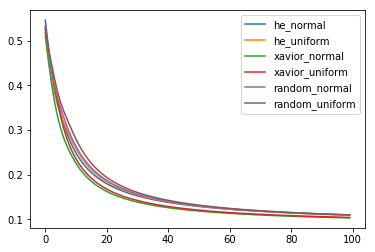

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(1,7):
    with open('kernel_init_{}.txt'.format(i),'rb') as f:
        tr_loss = pickle.load(f)[0]
        plt.plot(tr_loss)
    
plt.legend(weight_init_name)

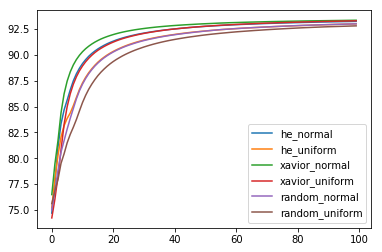

In [80]:
for i in range(1,7):
    with open('kernel_init_{}.txt'.format(i),'rb') as f:
        tr_acc = pickle.load(f)[1]
        plt.plot(tr_acc)
    
plt.legend(weight_init_name)

In [85]:
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer3 = tf.keras.optimizers.Adagrad(learning_rate=0.01)
optimizer4 = tf.keras.optimizers.RMSprop(learning_rate=0.001)

optimizers = [optimizer1,
             optimizer2,
             optimizer3,
             optimizer4]

optimizer_name = ['Adam',
                 'SGD',
                 'Adagrad',
                 'RMSprop']

In [86]:
EPOCHS = 100
idx = 0

for optimizer in optimizers:
    loss_object = tf.keras.losses.BinaryCrossentropy()

    @tf.function
    def train_step(data, labels):
        with tf.GradientTape() as tape:
            predictions = model(data)
            loss = loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_accuracy(labels, predictions)

    @tf.function
    def test_step(data, labels):
        predictions = model(data)
        t_loss = loss_object(labels, predictions)

        test_loss(t_loss)
        test_accuracy(labels, predictions)
        
    model = gen_model(5, kernel_initializer3)
    
    tr_loss = []
    tr_acc = []
    te_loss = []
    te_acc = []

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')
    
    for epoch in range(EPOCHS):
        for data, labels in train_ds:
            train_step(data, labels)

        for test_data, test_labels in test_ds:
            test_step(test_data, test_labels)

        template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
        print(template.format(epoch+1,
                             train_loss.result(),
                             train_accuracy.result()*100,
                             test_loss.result(),
                             test_accuracy.result()*100))

        tr_loss.append(train_loss.result())
        tr_acc.append(train_accuracy.result()*100)
        te_loss.append(test_loss.result())
        te_acc.append(test_accuracy.result()*100)
        
    with open('{}.txt'.format(optimizer_name[idx]), 'wb') as f:
         pickle.dump([tr_loss,tr_acc,te_loss,te_acc], f)
            
    idx += 1

W1016 15:08:32.690885 17416 base_layer.py:1814] Layer dense_54 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 1, 손실: 0.596846878528595, 정확도: 74.52812957763672, 테스트 손실: 0.5293108224868774, 테스트 정확도: 75.0
에포크: 2, 손실: 0.5418134331703186, 정확도: 75.59687805175781, 테스트 손실: 0.4817737638950348, 테스트 정확도: 76.96562194824219
에포크: 3, 손실: 0.4869367182254791, 정확도: 78.4124984741211, 테스트 손실: 0.4299747347831726, 테스트 정확도: 80.45208740234375
에포크: 4, 손실: 0.43835824728012085, 정확도: 80.67617797851562, 테스트 손실: 0.38866689801216125, 테스트 정확도: 82.2015609741211
에포크: 5, 손실: 0.4000175893306732, 정확도: 82.03531646728516, 테스트 손실: 0.3571779727935791, 테스트 정확도: 83.2300033569336
에포크: 6, 손실: 0.3697737753391266, 정확도: 82.95130157470703, 테스트 손실: 0.33197447657585144, 테스트 정확도: 84.08958435058594
에포크: 7, 손실: 0.3442702889442444, 정확도: 83.95201110839844, 테스트 손실: 0.30964717268943787, 테스트 정확도: 84.96696472167969
에포크: 8, 손실: 0.32136762142181396, 정확도: 85.0503921508789, 테스트 손실: 0.28940171003341675, 테스트 정확도: 86.0101547241211
에포크: 9, 손실: 0.30081310868263245, 정확도: 85.98750305175781, 테스트 손실: 0.2713324725627899, 테스트 정확도: 86.83472442626953
에포크: 10, 손실: 

에포크: 74, 손실: 0.11457440257072449, 정확도: 92.8159408569336, 테스트 손실: 0.11100498586893082, 테스트 정확도: 92.81317901611328
에포크: 75, 손실: 0.11420144885778427, 정확도: 92.830810546875, 테스트 손실: 0.1106865331530571, 테스트 정확도: 92.82424926757812
에포크: 76, 손실: 0.1138390451669693, 정확도: 92.84257507324219, 테스트 손실: 0.11037574708461761, 테스트 정확도: 92.83502960205078
에포크: 77, 손실: 0.11348628997802734, 정확도: 92.85585021972656, 테스트 손실: 0.11007234454154968, 테스트 정확도: 92.84634399414062
에포크: 78, 손실: 0.11314219981431961, 정확도: 92.86798858642578, 테스트 손실: 0.10977629572153091, 테스트 정확도: 92.85368347167969
에포크: 79, 손실: 0.11280705034732819, 정확도: 92.88034057617188, 테스트 손실: 0.10948750376701355, 테스트 정확도: 92.86542510986328
에포크: 80, 손실: 0.1124802976846695, 정확도: 92.88999938964844, 테스트 손실: 0.10920614004135132, 테스트 정확도: 92.87242126464844
에포크: 81, 손실: 0.11216118186712265, 정확도: 92.90050506591797, 테스트 손실: 0.10893277078866959, 테스트 정확도: 92.880859375
에포크: 82, 손실: 0.11185038089752197, 정확도: 92.9113540649414, 테스트 손실: 0.10866542160511017, 테스트 정확도: 92.8

W1016 15:10:33.104001 17416 base_layer.py:1814] Layer dense_56 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.10731136798858643, 정확도: 93.07459259033203, 테스트 손실: 0.10476577281951904, 테스트 정확도: 93.00968933105469
에포크: 1, 손실: 0.5727946758270264, 정확도: 75.0, 테스트 손실: 0.5600594878196716, 테스트 정확도: 75.0
에포크: 2, 손실: 0.5621273517608643, 정확도: 75.0, 테스트 손실: 0.5515983700752258, 테스트 정확도: 75.0
에포크: 3, 손실: 0.5534060597419739, 정확도: 75.0, 테스트 손실: 0.5440943837165833, 테스트 정확도: 75.0
에포크: 4, 손실: 0.5456939339637756, 정확도: 75.0, 테스트 손실: 0.5370708107948303, 테스트 정확도: 75.0
에포크: 5, 손실: 0.5384299755096436, 정확도: 75.0, 테스트 손실: 0.5302060842514038, 테스트 정확도: 75.00125122070312
에포크: 6, 손실: 0.5313438773155212, 정확도: 75.0101547241211, 테스트 손실: 0.523364245891571, 테스트 정확도: 75.04479217529297
에포크: 7, 손실: 0.5243162512779236, 정확도: 75.0935287475586, 테스트 손실: 0.516505777835846, 테스트 정확도: 75.20357513427734
에포크: 8, 손실: 0.5173311233520508, 정확도: 75.28925323486328, 테스트 손실: 0.5096732974052429, 테스트 정확도: 75.48359680175781
에포크: 9, 손실: 0.5104126930236816, 정확도: 75.6123275756836, 테스트 손실: 0.5028822422027588, 테스트 정확도: 75.85832977294922
에포크: 10,

에포크: 75, 손실: 0.2536374628543854, 정확도: 89.4515609741211, 테스트 손실: 0.2502836585044861, 테스트 정확도: 89.61541748046875
에포크: 76, 손실: 0.2518331706523895, 정확도: 89.50713348388672, 테스트 손실: 0.24851033091545105, 테스트 정확도: 89.66973114013672
에포크: 77, 손실: 0.2500646412372589, 정확도: 89.56124114990234, 테스트 손실: 0.24677202105522156, 테스트 정확도: 89.72280883789062
에포크: 78, 손실: 0.2483309805393219, 정확도: 89.6140365600586, 테스트 손실: 0.24506813287734985, 테스트 정확도: 89.77452087402344
에포크: 79, 손실: 0.24663105607032776, 정확도: 89.66546630859375, 테스트 손실: 0.24339759349822998, 테스트 정확도: 89.82484436035156
에포크: 80, 손실: 0.24496467411518097, 정확도: 89.71548461914062, 테스트 손실: 0.24175983667373657, 테스트 정확도: 89.87397766113281
에포크: 81, 손실: 0.24333061277866364, 정확도: 89.76456451416016, 테스트 손실: 0.2401541769504547, 테스트 정확도: 89.92229461669922
에포크: 82, 손실: 0.24172784388065338, 정확도: 89.81232452392578, 테스트 손실: 0.23857972025871277, 테스트 정확도: 89.96920776367188
에포크: 83, 손실: 0.24015572667121887, 정확도: 89.8591537475586, 테스트 손실: 0.23703551292419434, 테스트 정확도: 9

W1016 15:12:29.112705 17416 base_layer.py:1814] Layer dense_58 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.21747085452079773, 정확도: 90.51374816894531, 테스트 손실: 0.21475975215435028, 테스트 정확도: 90.65362548828125
에포크: 1, 손실: 0.5522941946983337, 정확도: 74.9468765258789, 테스트 손실: 0.5256870985031128, 테스트 정확도: 75.0
에포크: 2, 손실: 0.5296264886856079, 정확도: 75.0679702758789, 테스트 손실: 0.5074298977851868, 테스트 정확도: 75.38436889648438
에포크: 3, 손실: 0.5109015107154846, 정확도: 75.64010620117188, 테스트 손실: 0.49090442061424255, 테스트 정확도: 76.08125305175781
에포크: 4, 손실: 0.49417948722839355, 정확도: 76.2152328491211, 테스트 손실: 0.47569534182548523, 테스트 정확도: 76.7265625
에포크: 5, 손실: 0.4789730906486511, 정확도: 76.94844055175781, 테스트 손실: 0.46177583932876587, 테스트 정확도: 77.71624755859375
에포크: 6, 손실: 0.46518203616142273, 정확도: 77.89192962646484, 테스트 손실: 0.44916561245918274, 테스트 정확도: 78.65416717529297
에포크: 7, 손실: 0.45272254943847656, 정확도: 78.71339416503906, 테스트 손실: 0.43778279423713684, 테스트 정확도: 79.38749694824219
에포크: 8, 손실: 0.4414635896682739, 정확도: 79.37383270263672, 테스트 손실: 0.4274906814098358, 테스트 정확도: 79.98124694824219
에포크: 9, 손실: 

에포크: 74, 손실: 0.2289627343416214, 정확도: 89.53353118896484, 테스트 손실: 0.22561253607273102, 테스트 정확도: 89.72280883789062
에포크: 75, 손실: 0.22767236828804016, 정확도: 89.588623046875, 테스트 손실: 0.22435320913791656, 테스트 정확도: 89.77666473388672
에포크: 76, 손실: 0.2264069765806198, 정확도: 89.64234924316406, 테스트 손실: 0.22311806678771973, 테스트 정확도: 89.82902526855469
에포크: 77, 손실: 0.22516652941703796, 정확도: 89.6947021484375, 테스트 손실: 0.2219066321849823, 테스트 정확도: 89.8800277709961
에포크: 78, 손실: 0.22394944727420807, 정확도: 89.74571228027344, 테스트 손실: 0.22071802616119385, 테스트 정확도: 89.9298095703125
에포크: 79, 손실: 0.2227555364370346, 정확도: 89.79564666748047, 테스트 손실: 0.21955187618732452, 테스트 정확도: 89.9780044555664
에포크: 80, 손실: 0.22158381342887878, 정확도: 89.84414672851562, 테스트 손실: 0.2184072583913803, 테스트 정확도: 90.02507781982422
에포크: 81, 손실: 0.22043390572071075, 정확도: 89.89130401611328, 테스트 손실: 0.21728375554084778, 테스트 정확도: 90.07075500488281
에포크: 82, 손실: 0.2193053811788559, 정확도: 89.9372329711914, 테스트 손실: 0.21618087589740753, 테스트 정확도: 90.11

W1016 15:14:36.310403 17416 base_layer.py:1814] Layer dense_60 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.20205950736999512, 정확도: 90.60812377929688, 테스트 손실: 0.19930636882781982, 테스트 정확도: 90.76587677001953
에포크: 1, 손실: 0.5335950255393982, 정확도: 75.1968765258789, 테스트 손실: 0.47430235147476196, 테스트 정확도: 77.09375
에포크: 2, 손실: 0.4820195138454437, 정확도: 76.7007827758789, 테스트 손실: 0.43209120631217957, 테스트 정확도: 78.97187805175781
에포크: 3, 손실: 0.4398772716522217, 정확도: 78.95989227294922, 테스트 손실: 0.3962109088897705, 테스트 정확도: 80.91041564941406
에포크: 4, 손실: 0.4049519896507263, 정확도: 80.7464828491211, 테스트 손실: 0.3667190372943878, 테스트 정확도: 82.4375
에포크: 5, 손실: 0.37629151344299316, 정확도: 82.02093505859375, 테스트 손실: 0.34276431798934937, 테스트 정확도: 83.38999938964844
에포크: 6, 손실: 0.35276415944099426, 정확도: 82.90287017822266, 테스트 손실: 0.3230380117893219, 테스트 정확도: 84.03333282470703
에포크: 7, 손실: 0.3333057463169098, 정확도: 83.54241180419922, 테스트 손실: 0.30677852034568787, 테스트 정확도: 84.49553680419922
에포크: 8, 손실: 0.3172108232975006, 정확도: 84.02265930175781, 테스트 손실: 0.29347148537635803, 테스트 정확도: 84.85702514648438
에포크: 9, 손실: 

에포크: 74, 손실: 0.1399388313293457, 정확도: 92.13036346435547, 테스트 손실: 0.1359616369009018, 테스트 정확도: 92.2696762084961
에포크: 75, 손실: 0.1394166201353073, 정확도: 92.1505355834961, 테스트 손실: 0.13547354936599731, 테스트 정확도: 92.28933715820312
에포크: 76, 손실: 0.13890741765499115, 정확도: 92.17049407958984, 테스트 손실: 0.13499733805656433, 테스트 정확도: 92.30879974365234
에포크: 77, 손실: 0.1384100764989853, 정확도: 92.1890640258789, 테스트 손실: 0.1345314085483551, 테스트 정확도: 92.3280029296875
에포크: 78, 손실: 0.13792391121387482, 정확도: 92.2068099975586, 테스트 손실: 0.13407647609710693, 테스트 정확도: 92.34615325927734
에포크: 79, 손실: 0.13744784891605377, 정확도: 92.22604370117188, 테스트 손실: 0.13363151252269745, 테스트 정확도: 92.36337280273438
에포크: 80, 손실: 0.13698281347751617, 정확도: 92.24400329589844, 테스트 손실: 0.13319852948188782, 테스트 정확도: 92.3804702758789
에포크: 81, 손실: 0.13652794063091278, 정확도: 92.26091766357422, 테스트 손실: 0.13277387619018555, 테스트 정확도: 92.39636993408203
에포크: 82, 손실: 0.13608311116695404, 정확도: 92.27764892578125, 테스트 손실: 0.13236019015312195, 테스트 정확도: 92.

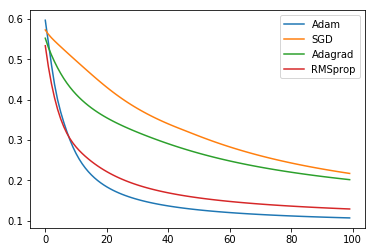

In [89]:
for name in optimizer_name:
    with open('{}.txt'.format(name),'rb') as f:
        tr_loss = pickle.load(f)[0]
        plt.plot(tr_loss)
    
plt.legend(optimizer_name)

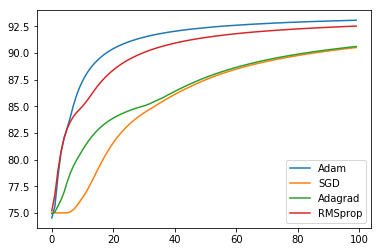

In [90]:
for name in optimizer_name:
    with open('{}.txt'.format(name),'rb') as f:
        tr_acc = pickle.load(f)[1]
        plt.plot(tr_acc)
    
plt.legend(optimizer_name)

In [94]:
yeh = np.around(3 + 4)
tieding = np.around(np.sqrt(3*4))
paola = np.around(2+(3*4) + ((3+4) * 0.5*4) - 3 / (3 + 4))
wang = np.around(2*3 / 3)


hidden_nums = [yeh,tieding,paola,wang]
hidden_name = ['yeh','tieding','paola','wang']

hidden_nums

[7, 3.0, 28.0, 2.0]

In [95]:
EPOCHS = 100
idx = 0

for hidden_num in hidden_nums:
    loss_object = tf.keras.losses.BinaryCrossentropy()
    optimizer = tf.keras.optimizers.Adam()
    
    @tf.function
    def train_step(data, labels):
        with tf.GradientTape() as tape:
            predictions = model(data)
            loss = loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_accuracy(labels, predictions)

    @tf.function
    def test_step(data, labels):
        predictions = model(data)
        t_loss = loss_object(labels, predictions)

        test_loss(t_loss)
        test_accuracy(labels, predictions)
        
    model = gen_model(hidden_num, kernel_initializer3)
    
    tr_loss = []
    tr_acc = []
    te_loss = []
    te_acc = []

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')
    
    for epoch in range(EPOCHS):
        for data, labels in train_ds:
            train_step(data, labels)

        for test_data, test_labels in test_ds:
            test_step(test_data, test_labels)

        template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
        print(template.format(epoch+1,
                             train_loss.result(),
                             train_accuracy.result()*100,
                             test_loss.result(),
                             test_accuracy.result()*100))

        tr_loss.append(train_loss.result())
        tr_acc.append(train_accuracy.result()*100)
        te_loss.append(test_loss.result())
        te_acc.append(test_accuracy.result()*100)
        
    with open('{}.txt'.format(hidden_name[idx]), 'wb') as f:
         pickle.dump([tr_loss,tr_acc,te_loss,te_acc], f)
            
    idx += 1

W1016 15:27:51.181834 17416 base_layer.py:1814] Layer dense_62 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 1, 손실: 0.5361323356628418, 정확도: 75.0, 테스트 손실: 0.4711921513080597, 테스트 정확도: 75.66875457763672
에포크: 2, 손실: 0.46664902567863464, 정확도: 78.62890625, 테스트 손실: 0.3971861004829407, 테스트 정확도: 81.5531234741211
에포크: 3, 손실: 0.3975577652454376, 정확도: 82.48177337646484, 테스트 손실: 0.3320067226886749, 테스트 정확도: 85.53541564941406
에포크: 4, 손실: 0.3396439850330353, 정확도: 85.28437805175781, 테스트 손실: 0.28354939818382263, 테스트 정확도: 87.59375
에포크: 5, 손실: 0.2966901957988739, 정확도: 86.96812438964844, 테스트 손실: 0.24955056607723236, 테스트 정확도: 88.83625030517578
에포크: 6, 손실: 0.26530224084854126, 정확도: 88.09557342529297, 테스트 손실: 0.2251349836587906, 테스트 정확도: 89.67708587646484
에포크: 7, 손실: 0.24178873002529144, 정확도: 88.9140625, 테스트 손실: 0.20688331127166748, 테스트 정확도: 90.28214263916016
에포크: 8, 손실: 0.22363314032554626, 정확도: 89.50801086425781, 테스트 손실: 0.1927863359451294, 테스트 정확도: 90.74687194824219
에포크: 9, 손실: 0.20922528207302094, 정확도: 89.96771240234375, 테스트 손실: 0.1816272884607315, 테스트 정확도: 91.08680725097656
에포크: 10, 손실: 0.19753687083721

에포크: 74, 손실: 0.10208018869161606, 정확도: 93.322509765625, 테스트 손실: 0.09866917133331299, 테스트 정확도: 93.48902130126953
에포크: 75, 손실: 0.10187482833862305, 정확도: 93.32941436767578, 테스트 손실: 0.09851139038801193, 테스트 정확도: 93.4939956665039
에포크: 76, 손실: 0.10167517513036728, 정확도: 93.33634948730469, 테스트 손실: 0.0983574166893959, 테스트 정확도: 93.4959716796875
에포크: 77, 손실: 0.10147994756698608, 정확도: 93.3431625366211, 테스트 손실: 0.09820908308029175, 테스트 정확도: 93.49894714355469
에포크: 78, 손실: 0.10128947347402573, 정확도: 93.3503189086914, 테스트 손실: 0.09806468337774277, 테스트 정확도: 93.50216674804688
에포크: 79, 손실: 0.1011052280664444, 정확도: 93.35575866699219, 테스트 손실: 0.09792166948318481, 테스트 정확도: 93.5065689086914
에포크: 80, 손실: 0.10092566162347794, 정확도: 93.36170196533203, 테스트 손실: 0.09778231382369995, 테스트 정확도: 93.51094055175781
에포크: 81, 손실: 0.10074961185455322, 정확도: 93.36705017089844, 테스트 손실: 0.09764644503593445, 테스트 정확도: 93.51512145996094
에포크: 82, 손실: 0.10057900846004486, 정확도: 93.37155151367188, 테스트 손실: 0.09751424193382263, 테스트 정확도: 9

W1016 15:30:02.080454 17416 base_layer.py:1814] Layer dense_64 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.09807924181222916, 정확도: 93.46080780029297, 테스트 손실: 0.0955861508846283, 테스트 정확도: 93.572998046875
에포크: 1, 손실: 0.5319905281066895, 정확도: 75.2593765258789, 테스트 손실: 0.4975431561470032, 테스트 정확도: 77.1812515258789
에포크: 2, 손실: 0.49785691499710083, 정확도: 77.6382827758789, 테스트 손실: 0.4664499759674072, 테스트 정확도: 79.015625
에포크: 3, 손실: 0.4701036512851715, 정확도: 78.65520477294922, 테스트 손실: 0.4425099790096283, 테스트 정확도: 79.25
에포크: 4, 손실: 0.4463619291782379, 정확도: 79.2281265258789, 테스트 손실: 0.421381413936615, 테스트 정확도: 79.7109375
에포크: 5, 손실: 0.42590609192848206, 정확도: 79.89344024658203, 테스트 손실: 0.4034375846385956, 테스트 정확도: 80.3812484741211
에포크: 6, 손실: 0.408031165599823, 정확도: 80.47369384765625, 테스트 손실: 0.387147456407547, 테스트 정확도: 80.92604064941406
에포크: 7, 손실: 0.3913230895996094, 정확도: 81.30758666992188, 테스트 손실: 0.3714826703071594, 테스트 정확도: 81.90535736083984
에포크: 8, 손실: 0.3755030333995819, 정확도: 82.21210479736328, 테스트 손실: 0.35659098625183105, 테스트 정확도: 82.80546569824219
에포크: 9, 손실: 0.3600441813468933, 

에포크: 74, 손실: 0.15432873368263245, 정확도: 91.7120361328125, 테스트 손실: 0.1536501795053482, 테스트 정확도: 91.82144927978516
에포크: 75, 손실: 0.15377792716026306, 정확도: 91.73048400878906, 테스트 손실: 0.1531488597393036, 테스트 정확도: 91.83866119384766
에포크: 76, 손실: 0.1532418578863144, 정확도: 91.74718475341797, 테스트 손실: 0.15265774726867676, 테스트 정확도: 91.85501861572266
에포크: 77, 손실: 0.15271861851215363, 정확도: 91.76361846923828, 테스트 손실: 0.15217964351177216, 테스트 정확도: 91.87158966064453
에포크: 78, 손실: 0.15220773220062256, 정확도: 91.77960968017578, 테스트 손실: 0.15171322226524353, 테스트 정확도: 91.8878173828125
에포크: 79, 손실: 0.1517096906900406, 정확도: 91.79557037353516, 테스트 손실: 0.15125581622123718, 테스트 정확도: 91.9019775390625
에포크: 80, 손실: 0.15122228860855103, 정확도: 91.81060791015625, 테스트 손실: 0.15080969035625458, 테스트 정확도: 91.91671752929688
에포크: 81, 손실: 0.1507464349269867, 정확도: 91.82588195800781, 테스트 손실: 0.15037456154823303, 테스트 정확도: 91.93063354492188
에포크: 82, 손실: 0.1502816379070282, 정확도: 91.84078216552734, 테스트 손실: 0.14994928240776062, 테스트 정확도: 9

W1016 15:32:04.845368 17416 base_layer.py:1814] Layer dense_66 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.14340710639953613, 정확도: 92.0571060180664, 테스트 손실: 0.14364852011203766, 테스트 정확도: 92.14643859863281
에포크: 1, 손실: 0.38290607929229736, 정확도: 82.59687805175781, 테스트 손실: 0.20830845832824707, 테스트 정확도: 93.5625
에포크: 2, 손실: 0.2637122571468353, 정확도: 88.1187515258789, 테스트 손실: 0.16089172661304474, 테스트 정확도: 93.62812805175781
에포크: 3, 손실: 0.21040979027748108, 정확도: 89.98645782470703, 테스트 손실: 0.1397557556629181, 테스트 정확도: 93.59791564941406
에포크: 4, 손실: 0.181520476937294, 정확도: 90.9332046508789, 테스트 손실: 0.1282062530517578, 테스트 정확도: 93.640625
에포크: 5, 손실: 0.16356520354747772, 정확도: 91.45968627929688, 테스트 손실: 0.12058895081281662, 테스트 정확도: 93.66875457763672
에포크: 6, 손실: 0.15131023526191711, 정확도: 91.82083892822266, 테스트 손실: 0.1153150424361229, 테스트 정확도: 93.71666717529297
에포크: 7, 손실: 0.1424417942762375, 정확도: 92.0796890258789, 테스트 손실: 0.1115090474486351, 테스트 정확도: 93.7249984741211
에포크: 8, 손실: 0.13571065664291382, 정확도: 92.28495788574219, 테스트 손실: 0.10853502154350281, 테스트 정확도: 93.7734375
에포크: 9, 손실: 0.13042

에포크: 73, 손실: 0.09206432849168777, 정확도: 93.74077606201172, 테스트 손실: 0.08938390761613846, 테스트 정확도: 93.73133850097656
에포크: 74, 손실: 0.09198707342147827, 정확도: 93.7449722290039, 테스트 손실: 0.08935163170099258, 테스트 정확도: 93.72821044921875
에포크: 75, 손실: 0.09191251546144485, 정확도: 93.74849700927734, 테스트 손실: 0.0893205776810646, 테스트 정확도: 93.72933197021484
에포크: 76, 손실: 0.09184014797210693, 정확도: 93.75181579589844, 테스트 손실: 0.08929019421339035, 테스트 정확도: 93.72713470458984
에포크: 77, 손실: 0.09176865220069885, 정확도: 93.75440216064453, 테스트 손실: 0.08926378935575485, 테스트 정확도: 93.72872924804688
에포크: 78, 손실: 0.0916997417807579, 정확도: 93.75690460205078, 테스트 손실: 0.08923779428005219, 테스트 정확도: 93.73028564453125
에포크: 79, 손실: 0.09163329750299454, 정확도: 93.75816345214844, 테스트 손실: 0.0892096534371376, 테스트 정확도: 93.72911071777344
에포크: 80, 손실: 0.09156849980354309, 정확도: 93.76138305664062, 테스트 손실: 0.0891837328672409, 테스트 정확도: 93.73015594482422
에포크: 81, 손실: 0.09150380641222, 정확도: 93.76441192626953, 테스트 손실: 0.08915769308805466, 테스트 정확도: 

W1016 15:34:14.494550 17416 base_layer.py:1814] Layer dense_68 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



에포크: 100, 손실: 0.09051894396543503, 정확도: 93.8155288696289, 테스트 손실: 0.08878977596759796, 테스트 정확도: 93.72180938720703
에포크: 1, 손실: 0.5546334981918335, 정확도: 75.5718765258789, 테스트 손실: 0.5124344825744629, 테스트 정확도: 78.38125610351562
에포크: 2, 손실: 0.5157027840614319, 정확도: 78.09452819824219, 테스트 손실: 0.4778475761413574, 테스트 정확도: 79.7906265258789
에포크: 3, 손실: 0.4838128983974457, 정확도: 79.13176727294922, 테스트 손실: 0.4524405002593994, 테스트 정확도: 80.26458740234375
에포크: 4, 손실: 0.46067699790000916, 정확도: 79.65742492675781, 테스트 손실: 0.43487581610679626, 테스트 정확도: 80.4828109741211
에포크: 5, 손실: 0.4438486695289612, 정확도: 79.9653091430664, 테스트 손실: 0.42211663722991943, 테스트 정확도: 80.625
에포크: 6, 손실: 0.4311429560184479, 정확도: 80.17005157470703, 테스트 손실: 0.4124620258808136, 테스트 정확도: 80.70832824707031
에포크: 7, 손실: 0.42123958468437195, 정확도: 80.31718444824219, 테스트 손실: 0.40485844016075134, 테스트 정확도: 80.77589416503906
에포크: 8, 손실: 0.4132951498031616, 정확도: 80.42655944824219, 테스트 손실: 0.3987221419811249, 테스트 정확도: 80.8257827758789
에포크: 9, 손

에포크: 74, 손실: 0.34779125452041626, 정확도: 81.47464752197266, 테스트 손실: 0.3458286225795746, 테스트 정확도: 81.48352813720703
에포크: 75, 손실: 0.3476021885871887, 정확도: 81.48323059082031, 테스트 손실: 0.34566357731819153, 테스트 정확도: 81.49391174316406
에포크: 76, 손실: 0.34741830825805664, 정확도: 81.49263763427734, 테스트 손실: 0.3454967737197876, 테스트 정확도: 81.50230407714844
에포크: 77, 손실: 0.34723907709121704, 정확도: 81.50069427490234, 테스트 손실: 0.3453353941440582, 테스트 정확도: 81.51144409179688
에포크: 78, 손실: 0.3470640778541565, 정확도: 81.50979614257812, 테스트 손실: 0.34517741203308105, 테스트 정확도: 81.51922607421875
에포크: 79, 손실: 0.346892774105072, 정확도: 81.51675415039062, 테스트 손실: 0.34502360224723816, 테스트 정확도: 81.5289535522461
에포크: 80, 손실: 0.3467262089252472, 정확도: 81.5252914428711, 테스트 손실: 0.3448764681816101, 테스트 정확도: 81.53836059570312
에포크: 81, 손실: 0.3465634882450104, 정확도: 81.53352355957031, 테스트 손실: 0.34473034739494324, 테스트 정확도: 81.54591369628906
에포크: 82, 손실: 0.34640517830848694, 정확도: 81.53999328613281, 테스트 손실: 0.3445867896080017, 테스트 정확도: 81.55

In [114]:
hidden_name

['yeh', 'tieding', 'paola', 'wang']

In [115]:
hidden_nums

[7, 3.0, 28.0, 2.0]

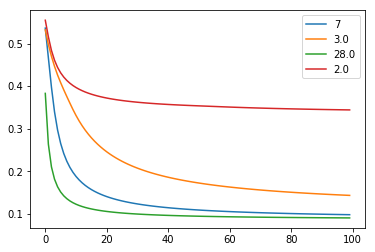

In [119]:
for name in hidden_name:
    with open('{}.txt'.format(name),'rb') as f:
        tr_loss = pickle.load(f)[0]
        plt.plot(tr_loss)
    
plt.legend(hidden_nums)

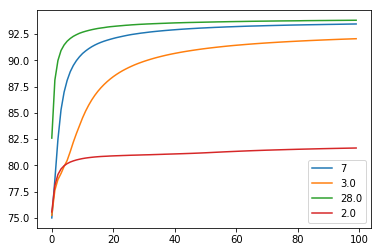

In [120]:
for name in hidden_name:
    with open('{}.txt'.format(name),'rb') as f:
        tr_acc = pickle.load(f)[1]
        plt.plot(tr_acc)
    
plt.legend(hidden_nums)